* Descriptive Statistics - A descriptive statistic is a summary statistic that quantitatively describes or summarizes features from a collection of information, while descriptive statistics is the process of using and analysing those statistics.
* Why is Descriptive Statistics important? - Descriptive statistics are very important because if we simply presented our raw data it would be hard to visualize what the data was showing, especially if there was a lot of it. Descriptive statistics therefore enables us to present the data in a more meaningful way, which allows simpler interpretation of the data. For example, if we had the results of 100 pieces of students' coursework, we may be interested in the overall performance of those students. We would also be interested in the distribution or spread of the marks. Descriptive statistics allow us to do this.
* Role of Descriptive Statistics in Machine learning - Descriptive Statistical Analysis helps you to understand your data and is a very important part of Machine Learning. This is due to Machine Learning being all about making predictions. On the other hand, statistics is all about drawing conclusions from data, which is a necessary initial step.


In [88]:
# importing required libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis


In [46]:
pd.set_option("display.max_columns",None)  # to display all the columns
pd.options.display.float_format = "{:,.2f}".format # to display float value upto two decimals

Format : A data frame with 53940 rows and 10 variables

Description : A dataset containing the prices and other attributes of almost 54,000 diamonds.

The variables are as follows:

*   price:  price in US dollars (\$326--\$18,823)
*   carat: weight of the diamond (0.2--5.01)
*   cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
*   colour: diamond colour, from J (worst) to D (best)
*   clarity: a measurement of how clear the diamond is (IF (best), VVS1, VVS2,VS1, VS2, SI1, SI2, I1 (worst) )
*   popularity: popularity of this specs (Good, Fair, Poor)
*   x: length in mm (0--10.74)
*   y: width in mm (0--58.9)
*   z: depth in mm (0--31.8)
*   depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
*   table: width of top of diamond relative to widest point (43--95)














In [64]:
# reading data from csv file 
xls = pd.read_csv('drive/MyDrive/datasets/diamonds.csv')

Measures of Central Tendency
* Mean - The sum of a collection of numbers divided by the count of numbers in the collection.
* Median - The median is the value separating the higher half from the lower half of a data sample, a population, or a probability distribution.
* Mode - The mode is the value that appears most often in a set of data values.

In [65]:
des_df = xls.drop(['id'],axis = 1) # drop id column
for col in des_df:   # drop all alpha-numeric columns
  if des_df[col].dtype == 'object':
    des_df = des_df.drop([col], axis = 1)

des_r = des_df.describe() # describe() gives us mean,min,max,median,1Q,3Q,std
des_r = des_r.rename(index={'50%':'median/50%'}) 

Measures of Dispersion
* Standard Deviation - The standard deviation is a measure of the amount of variation or dispersion of a set of values.
* Variance - The term variance refers to a statistical measurement of the spread between numbers in a data set.
* Min and Max Variables
  * Min is the minimum value in the column or in dataset.
  * Max is the maximum value in the column or in dataset.

Quartiles -  A quartile is a type of quantile which divides the number of data points into four parts, or quarters, of more-or-less equal size.
* 25% or 1st quartile - The first quartile (Q1) is defined as the middle number between the smallest number (minimum) and the median of the data set. It is also known as the lower or 25th empirical quartile, as 25% of the data is below this point.
* 50% or 2nd quartile - The second quartile (Q2) is the median of a data set; thus 50% of the data lies below this point.
* 75% or 3rd quartile - The third quartile (Q3) is the middle value between the median and the highest value (maximum) of the data set. It is known as the upper or 75th empirical quartile, as 75% of the data lies below this point.

In [91]:
var_r = des_df.var() # calulating variance seperately

varlist = []
for col in des_df.columns: # converting result of var() from series to list
  if df[col].dtype == 'object':
    continue
  varlist.append(round(df[col],5))

df = pd.DataFrame([varlist],columns=des_r.columns, index=['var']) # putting results of variance into dataframe
mct = des_r.append(df) # adding var to describe result

In [67]:
mode_r = des_df.mode() # calculating mode seperately
mode_r = mode_r.rename(index={0:'mode'}) # renaming index
mct_m = mct.append(mode_r) # adding mode to describe result

Skewness and Kurtosis
* Skewness is a measure of the symmetry of a distribution. The highest point of a distribution is its mode.
* Kurtosis is a statistical measure that defines how heavily the tails of a distribution differ from the tails of a normal distribution.

In [ ]:
skew_r = skew(des_df) # skewness resultant list
df = pd.DataFrame([skew_r],columns=des_df.columns, index=['skewness']) # converting list to dataframe
mct_s = mct_m.append(df) # adding skewness to describe dataframe

kur_r = kurtosis(des_df) # kurtosis resultant list
df = pd.DataFrame([kur_r],columns=des_df.columns, index=['kurtosis']) # converting list to dataframe
mct_k = mct_s.append(df) # adding kurtosis to describe dataframe

Range - It is difference between largest and smallest value.

In [ ]:
r_list = []
for col in des_df.columns.to_list(): # calculating range for all columns
  r_list.append(des_df[col].max()-des_df[col].min())

df = pd.DataFrame([r_list],columns=des_df.columns, index=['range']) # converting range list to dataframe
mct_r = mct_k.append(df) # adding range to describe dataframe

In [92]:
print(mct_r) # print final dataframe

               carat     depth     table         price         x         y  \
count      53,938.00 53,940.00 53,940.00     53,936.00 53,940.00 53,940.00   
mean            0.80     61.75     57.46      3,932.83      5.73      5.73   
std             0.47      1.43      2.23      3,989.44      1.12      1.14   
min             0.20     43.00     43.00        326.00      0.00      0.00   
25%             0.40     61.00     56.00        950.00      4.71      4.72   
median/50%      0.70     61.80     57.00      2,401.00      5.70      5.71   
75%             1.04     62.50     59.00      5,324.25      6.54      6.54   
max             5.01     79.00     95.00     18,823.00     10.74     58.90   
var             0.22      2.05      4.99 15,915,659.88      1.26      1.30   
mode            0.30     62.00     56.00        605.00      4.37      4.34   
skewness         nan     -0.08      0.80           nan      0.38      2.43   
kurtosis         nan      5.74      2.80           nan     -0.62

Box Plots - A box and whisker plot (sometimes called a boxplot) is a graph that presents information from a five-number summary.
* Lowest observation
* Highest observation
* Lower Quartile
* Upper Quartile
* Median

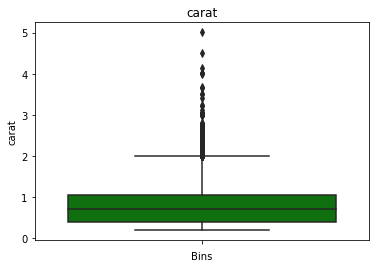

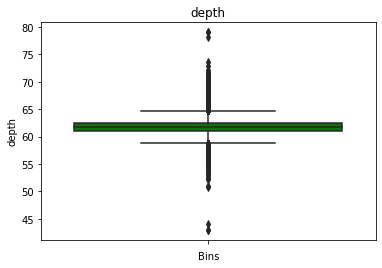

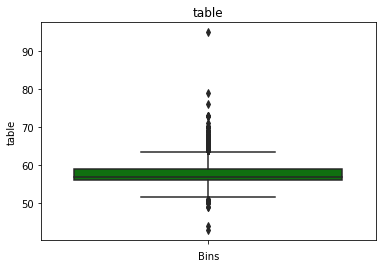

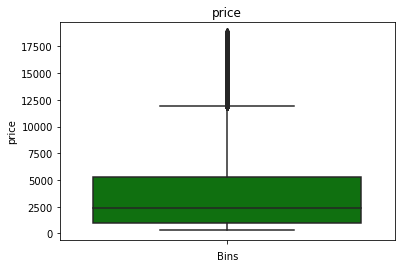

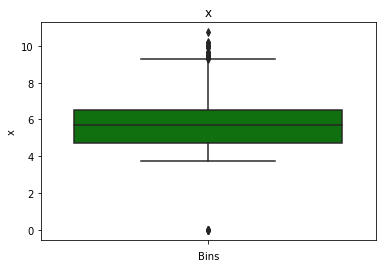

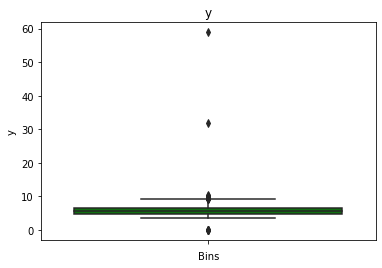

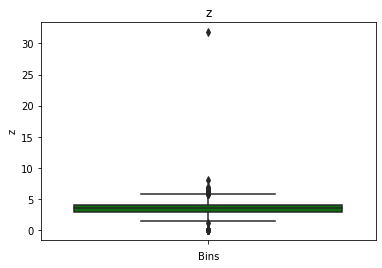

In [95]:
# plotting boxplots
colNames = xls.columns.tolist() # make a list of columns present in dataframes
for colName in colNames:
    if xls[colName].dtype == "object" or colName == 'id': # skip Id and string columns
        continue
    plt.figure()
    sns.boxplot(y=xls[colName], color='g') # plot the boxplot
    plt.title(colName) # provide title
    plt.ylabel(colName) # name Y axis
    plt.xlabel('Bins') # name X axis
    plt.show()